<img src="https://editor.analyticsvidhya.com/uploads/521138.png"> </img>

## VGG-11 is a convolutional neural network that specializes in processing images

In [1]:
# Load up our imports
import torchvision.models as models
import torch.nn as nn
import torch
import matplotlib.pyplot as plt
import numpy as np
import cv2
from torchvision import transforms

In [2]:
# Instantiate a VGG model with our saved weights
vgg_model = models.vgg11(weights=models.VGG11_Weights.IMAGENET1K_V1)  # B
# load the model using your available device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

vgg_model.classifier[-1] = nn.Linear(4096, 23)
vgg_model.load_state_dict(torch.load('E:/Graduation Project/ARTWORKS IMPLEMENTATIONS/PRETRAINED VGG ON WIKIART BY ARTIST/vgg11_10_wikiart.pt',
                                    map_location=torch.device(device)))

vgg_model.eval()


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (11): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): ReLU(inplace=True)
    (13): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (14): ReLU(inplace=True)
    (15): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
 

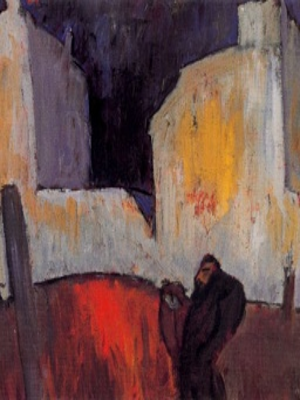

In [57]:
from PIL import Image

img = Image.open('E:/Graduation Project/ARTWORKS IMPLEMENTATIONS/query test dataset/000023.jpg')
#Resize the image
newsize = (300, 400)
img = img.resize(newsize)
img


In [58]:
_transforms = transforms.Compose(
[
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # standardization of pixel colors
])

image_matrix = np.asarray(np.expand_dims(_transforms(img), 0))
image_vector = vgg_model.features(torch.tensor(image_matrix)).mean((2, 3))


In [59]:
for x in range(1,73):
  zeros_num = 6-len(str(x))
  zeros = ""
  for k in range(zeros_num):
    zeros+="0"
    
  img2_path = "E:/Graduation Project/ARTWORKS IMPLEMENTATIONS/query test dataset/"+zeros+str(x)+".jpg"
  img2 = Image.open(img2_path)
  #Resize the image to be same size as input image  
  newsize = (300, 400)
  img2 = img2.resize(newsize)
    
  image2_matrix = np.asarray(np.expand_dims(_transforms(img2), 0))
  image2_vector = vgg_model.features(torch.tensor(image2_matrix)).mean((2, 3))


  image = cv2.imread(img2_path, cv2.IMREAD_ANYCOLOR)  
    
  cosine_similarity = torch.cosine_similarity(image_vector, image2_vector)

 # print(cosine_similarity)

  if cosine_similarity >= 0.75:
    print("Cosine Similarity of The Main Image and Image:"+ img2_path + " is: "+ str(cosine_similarity)+"%")
    image = cv2.resize(image, (640,640))
    cv2.imshow("artwork",image)
    cv2.waitKey(0)


print("done searching")

Cosine Similarity of The Main Image and Image:E:/Graduation Project/ARTWORKS IMPLEMENTATIONS/query test dataset/000023.jpg is: tensor([1.0000], grad_fn=<SumBackward1>)%
done searching


# Considersations


  We can consider other deep learning models like Resnet and the Vision Transformer
